# Impact of COVID on Fortune 100 Stock Price

This project analyzed the impact of COVID-19 pandemic on the stock price of fortune 100 companies based on free stock price data available on Yahoo Finance. I have utilized python to scrape data, did data cleaning and used Pandas/MatplotLib for EDA to analyze the impact.

## Approach

1. Get daily stock price data from yahoo finance and store it as a CSV file.
2. load and merge data in a data frame.
3. Transform data into pivot table so that each company's name becomes a new column (Transformed Rows into Columns).
4. Did visulization of data to find the point of decline in stock prices.
5. Split the dataset into two classes (before/after pandemic) based on the decline point identified using EDA technique in step-4.
6. Calculated average share price of each company 2 months before and after start of COVID-19 pandemic.
7. Calculated percentage change before/after, sorted based on percentage change and found 10 companies that were affected most/least.

In [522]:
# Create and Merge DataFrames from CSV files

import pandas as pd
import glob
import os
import numpy as np

path = r'C:\Users\shali\Desktop\fortune 100 stock' # use your path
arr = os.listdir(path)
li = []

for filename in arr:
    tmp = path;
    tmp += "\\";
    tmp += filename
    df = pd.read_csv(tmp,  header=0)
    mean=np.log(df.iloc[:, 1:5].mean(axis=1))
    new_df = pd.DataFrame()
    new_df['mean'] = mean
    new_df['Symbol'] = filename.split(".")[0]
    #print(type(mean))
    new_df['Date'] = df.iloc[: , [0]].copy() 
    
    
    #new_df['DT'] = dt
    li.append(new_df)


frame = pd.concat(li, axis=0, ignore_index=False)


frame.to_csv(r'C:\Users\shali\Desktop\dmnd projects/stoc_file.csv', sep=',',  index=False)

In [544]:
# Transform data into pivot table so that each company's name becomes a new column (Transformed Rows into Columns).
pv = pd.pivot_table(frame, 'mean', 'Date', 'Symbol')
pv

Symbol,ABBvie,AIG,AMZN,All_state,Alphabet,American_Airlines,American_express,Amerisource_bergen,At&T,Bankof_America,...,prudential,statefarm,stoneX,sysco,target,united_healthcare,unitedparcel_service,walmart,walt_disney,wells_fargo
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,4.490629,3.944054,7.541042,4.723953,7.213816,3.367468,4.830332,4.445177,3.663241,3.569110,...,4.547462,4.507337,4.865128,4.439204,4.846095,5.680147,4.761469,4.779942,4.988373,3.985041
2020-01-03,4.483454,3.936716,7.535052,4.721930,7.213509,3.328179,4.824225,4.431293,3.659772,3.553847,...,4.535445,4.499921,4.860471,4.434382,4.826071,5.663872,4.752275,4.771828,4.988475,3.975233
2020-01-06,4.486443,3.937739,7.539900,4.724619,7.225984,3.305787,4.817677,4.434500,3.663946,3.544793,...,4.530177,4.500698,4.847999,4.431233,4.819112,5.668527,4.749812,4.766247,4.979368,3.969159
2020-01-07,4.487568,3.934811,7.551882,4.722998,7.242553,3.309813,4.817536,4.439204,3.667464,3.546524,...,4.535633,4.496136,4.844325,4.429477,4.816707,5.669502,4.752232,4.761191,4.983572,3.966653
2020-01-08,4.493121,3.942455,7.547956,4.725882,7.245002,3.315095,4.827814,4.443710,3.673385,3.550192,...,4.544863,4.498920,4.845544,4.433789,4.820362,5.682576,4.755571,4.755463,4.979901,3.969301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-06,4.596129,3.431646,8.004857,4.562732,7.309008,2.540223,4.571691,4.612642,3.416661,3.167793,...,4.115086,4.451553,4.776494,3.997880,4.782228,5.710948,4.748036,4.780761,4.735518,3.241713
2020-07-07,4.598347,3.393165,8.016171,4.541538,7.312732,2.502869,4.544889,4.596508,3.411972,3.142858,...,4.093094,4.448867,4.759971,3.971894,4.774322,5.701129,4.740422,4.810496,4.733893,3.211045
2020-07-08,4.600534,3.379803,8.022907,4.488777,7.314531,2.465979,4.523635,4.580416,3.414607,3.135712,...,4.098046,4.454580,4.761917,3.973541,4.768734,5.697312,4.741099,4.838205,4.745106,3.197039


In [524]:
#Save pivot table data frame to csv
pv.to_csv(r'C:\Users\shali\Desktop\dmnd projects/sto_file.csv', sep=',',  index=True)

In [525]:
# build dataframe from the CSV
df1=pd.read_csv(r"C:\Users\shali\Desktop\dmnd projects\sto_file.csv")

In [601]:
# Get just enough data to do EDA
#df6 = df1[(df1['Date'] > '2020-02-15') & (df1['Date'] <= '2020-03-01')]
#df7=df6.set_index('Date')

#print(type(pv))
#print(df4.head())
#print(df3.index)
#print(df7)
#df8 = df7.pct_change(axis=0)
#df8

#sum_of_change
sum_of_change=df8.iloc[:, 1:85].sum(axis=1)
sum_of_change
#print(sum_of_change)

Date
2020-02-18    0.000000
2020-02-19   -0.022282
2020-02-20   -0.048392
2020-02-21   -0.100740
2020-02-24   -0.712518
2020-02-25   -0.475091
2020-02-26   -0.479333
2020-02-27   -0.896576
2020-02-28   -0.964994
dtype: float64

<AxesSubplot:xlabel='Date'>

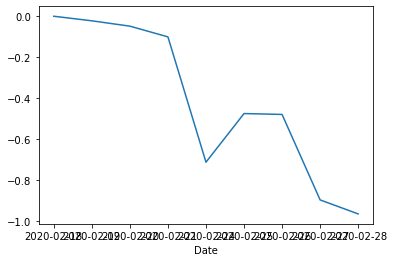

In [603]:

#cols = sum_of_change.columns.values
#xx = cols[1:8]
#sum_of_change.plot(x="Date", y=xx, kind="line")
sum_of_change.plot.line()

In [500]:
# build two different dataframes for before/after staring COVID
pandemicStart = '2020-02-12'
before=df1[(df1['Date'] <= pandemicStart)]
after = df1[(df1['Date'] > pandemicStart) & (df1['Date'] <= '2020-06-24')]

In [501]:
#Find mean stock price before/after starting COVID
before_avg= before.mean()
after_avg=after.mean()

In [502]:
#Find change and sort in ascending
change_perc=(after_avg-before_avg)/before_avg *100
sorted_series = change_perc.sort_values(ascending=True)

In [503]:
# Most impacted 10 companies
sorted_series.head(10)

freddie_mac          -44.324420
Fannie_Mae           -41.688562
Plains_GP_holdings   -24.472917
American_Airlines    -21.427464
apple                -21.427464
ford                 -20.444987
United_airlines      -19.710615
General_electric     -19.111642
Delta_airline        -16.800751
AIG                  -14.288907
dtype: float64

In [504]:
#Least impacted 10 companies
sorted_series.tail(10)

ABBvie                  -0.602910
Charter_communication   -0.569513
humana                  -0.377298
Progressive             -0.113513
COSTCO                  -0.048083
Amerisource_bergen       0.177083
Microsoft                0.418545
walmart                  0.751168
AMZN                     1.733677
Kroger                   3.424076
dtype: float64